In [10]:
import pandas as pd
data = pd.read_csv('/Users/alexvalentine/Downloads/data_fin.csv')
data.describe()
data.info()
# print(data.to_string()) # Tip: use to_string() to print the entire DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OBS     50 non-null     int64  
 1   E       50 non-null     int64  
 2   N       50 non-null     int64  
 3   S       50 non-null     int64  
 4   W       50 non-null     int64  
 5   PCEXP   50 non-null     float64
 6   EXP     50 non-null     float64
 7   PCAID   50 non-null     int64  
 8   AID     50 non-null     float64
 9   POP     50 non-null     int64  
 10  DEN     50 non-null     float64
 11  DPOP    50 non-null     float64
 12  URB     50 non-null     float64
 13  PCINC   50 non-null     int64  
 14  INC     50 non-null     float64
 15  PS      50 non-null     int64  
dtypes: float64(7), int64(9)
memory usage: 6.4 KB


<hr>

<div id="Apply the Regression Model">
    <h2>Apply the Regression Model</h2>
    
    
Use OLS model
</div>


In [3]:
import statsmodels.api as sm
# defining the variables

OBS = data['OBS'].tolist()     # The tolist() function is used to convert a given array to an ordinary list with the same items, elements, or values.
E = data['E'].tolist()
N = data['N'].tolist()
S = data['S'].tolist()
W = data['W'].tolist()
PCEXP = data['PCEXP'].tolist()
EXP = data['EXP'].tolist()
PCAID = data['PCAID'].tolist()
AID = data['AID'].tolist()
POP = data['POP'].tolist()
DEN = data['DEN'].tolist()
DPOP = data['DPOP'].tolist()
URB = data['URB'].tolist()
PCINC = data['PCINC'].tolist()
INC = data['INC'].tolist()
PS = data['PS'].tolist()

# regression model
import statsmodels.formula.api as smf
result = sm.OLS(EXP, AID, POP, INC).fit()
result = smf.ols('EXP ~ AID + POP + INC', data = data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EXP   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2186.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.35e-49
Time:                        12:38:44   Log-Likelihood:                -365.29
No. Observations:                  50   AIC:                             738.6
Df Residuals:                      46   BIC:                             746.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.6983     84.392     -0.542      0.591    -215.570     124.173
AID            3.2337      0.238     13.584      0.000       2.755       3.713
POP           -0.5941      0.104     -5.690      0.000      -0.804      -0.384
INC            0.0002   2.35e-05      8.103      0.000       0.000       0.000
==============================================================================
Omnibus:                        8.970   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.968
Skew:                           0.449   Prob(JB):                     0.000926
Kurtosis:                       5.429   Cond. No.                     4.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<hr>

<div id="visualization">
    <h2>Visualization</h2>
    
    
Lets visualize the regression
</div>


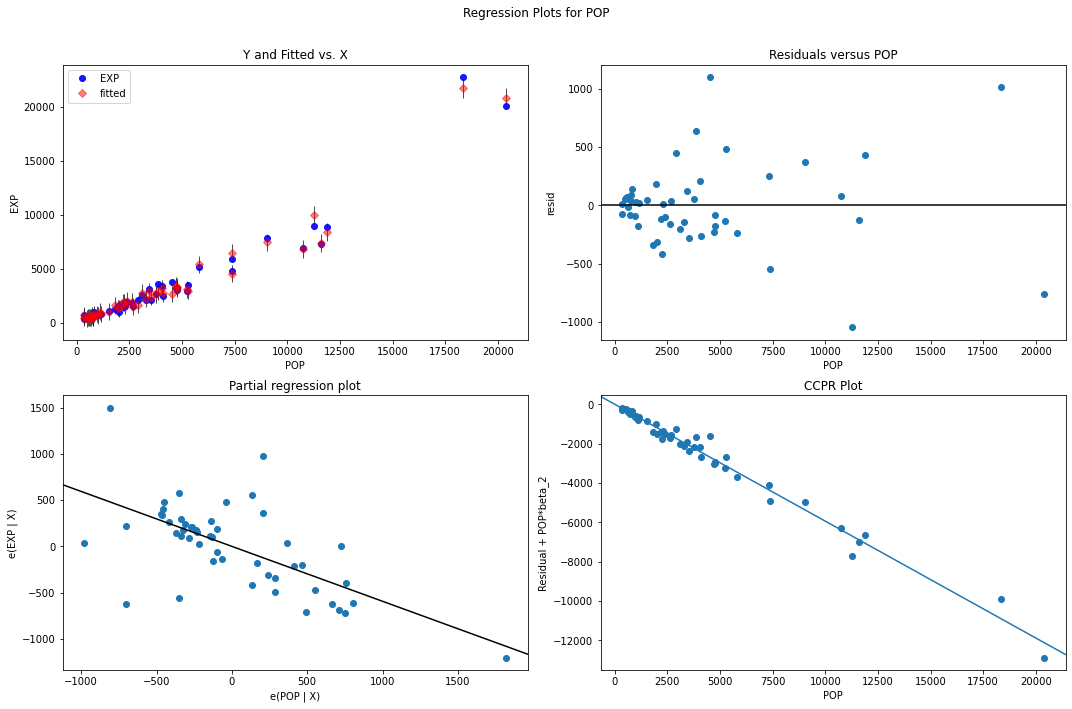

In [4]:
import matplotlib.pyplot as plt
#define figure size
fig = plt.figure(figsize=(15,10))

#produce regression plots
fig = sm.graphics.plot_regress_exog(result, 'POP', fig=fig)


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    It could be directly seen from the plots that the model is <b>heteroscedastic</b>. We could conduct tests like Goldfeld-Quandt test.  In here, I use the white test.
</div>


In [5]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.stats.diagnostic
# Conduct the Breusch-Pagan test
names = ['Expenditure data statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result1 = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(names, test_result1)

[('Expenditure data statistic', 20.707760849597275),
 ('p-value', 0.00012106056666184224),
 ('f-value', 10.839697097361006),
 ('f p-value', 1.6602243810889573e-05)]

In [6]:
# Conduct the White test
test_result2 = statsmodels.stats.diagnostic.het_white(result.resid, result.model.exog)
lzip(names, test_result2)

[('Expenditure data statistic', 27.786151446213246),
 ('p-value', 0.0005166659534584929),
 ('f-value', 6.410596786821415),
 ('f p-value', 2.1783940887920694e-05)]

<hr>

<div id="Adjust the Model with Bias">
    <h2>Adjust the Model with Bias</h2>
    The changes is obvious in confidence interval.
</div>

In [12]:
# calculate confidence interval
# robust standard error
# result_robust = sm.OLS(EXP, AID, POP, INC).fit(cov_type='HC1')
result_robust = smf.ols('EXP ~ AID + POP + INC', data = data).fit(cov_type='HC1')
result_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EXP   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     995.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           7.99e-42
Time:                        12:58:19   Log-Likelihood:                -365.29
No. Observations:                  50   AIC:                             738.6
Df Residuals:                      46   BIC:                             746.2
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.6983     56.407     -0.810      0.418    -156.253      64.856
AID            3.2337      0.438      7.388      0.000       2.376       4.092
POP           -0.5941      0.115     -5.161      0.000      -0.820      -0.368
INC            0.0002   2.71e-05      7.016      0.000       0.000       0.000
==============================================================================
Omnibus:                        8.970   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.968
Skew:                           0.449   Prob(JB):                     0.000926
Kurtosis:                       5.429   Cond. No.                     4.61e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
result_robust.conf_int()

,0,1
Intercept,-156.253130,64.856479
AID,2.375883,4.091611
POP,-0.819696,-0.368455
INC,0.000137,0.000243


In [8]:
result.conf_int()

,0,1
Intercept,-215.569985,124.173333
AID,2.754569,3.712925
POP,-0.804220,-0.383931
INC,0.000143,0.000237


In [ ]:
#https://github.com/UtaHagen